# MuMoT Demonstration Notebook: Variance-Suppression through Negative Feedback <a class="tocSkip">

## Multiscale Modelling Tool <a class="tocSkip">

*Andreagiovanni Reina, Department of Computer Science, University of Sheffield;
James A. R. Marshall, Department of Computer Science, University of Sheffield*

# Introduction
    
This notebook reproduces results representative of those presented in Reina &amp; Marshall ([2020](#references)), in which it is shown that negative feedback can acts as a mechanism to suppress stochastic fluctuations in a simple collective foraging model.

In [1]:
import mumot

Created `%%model` as an alias for `%%latex`.


# Model Definitions

We start with a full model of collective foraging that includes positive feedback, through recruitment, and negative, inhibitory feedback.
Taking collective foraging by honeybees as an exemplar, positive feedback through recruitment occurs via the <i>waggle dance</i> (von Frisch, [1967](#references)), while negative feedback occurs via the <i>stop signal</i> (Nieh, [1993](#references)).

In [2]:
%%model
$
U -> A : q_A
U -> B : q_B
A -> U : a
B -> U : a
A + U -> A + A : r_a
B + U -> B + B : r_b
A + A -> A + U : z
B + B -> B + U : z
$

<IPython.core.display.Latex object>

In [3]:
fullmodel = mumot.parseModel(In[2])
fullmodel.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

We next set a finite system size $N$, since on a short timescale there is a constant pool of foragers. This reduces the system to two ODEs:

In [4]:
fullmodel = fullmodel.substitute('U = N - A - B')
fullmodel.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Next we 'turn-off' the negative social feedback part of the model ($i.e.$ parameter $z=0$) to give a foraging model with only quality-independent positive feedback *r*. This is our **model without negative social feedback**:

In [5]:
posmodel = fullmodel.substitute('z = 0, r_a = r, r_b = r')
posmodel.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Instead, the **model with negative social feedback** has $z>0$ and quality-dependent positive social feedback (with strength $\rho$):

In [6]:
negmodel = fullmodel.substitute('r_a = \\rho q_A, r_b = \\rho q_B')
negmodel.showODEs()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Results

In the following, we analyse the models using both infinite-population ODEs, and finite population stochastic simulations.

## Model without negative social feedback

The analysis of the deterministic ODE system predicts that a population starting from a fully uncommmitted initial state ($i.e.$ all individuals at time $t=0$ are in uncommitted state $U$) will converge to the distribution:

$ A = q_A / (q_A + q_B) $

$ B = q_B / (q_A + q_B) $

FloatSlider(value=0.001, continuous_update=False, description='\\(a\\)', max=1.0, readout_format='.3f', step=0…

FloatSlider(value=0.8, continuous_update=False, description='\\(q_{A}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=0.4, continuous_update=False, description='\\(q_{B}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=100.0, continuous_update=False, description='\\(r\\)', max=200.0, readout_format='.0f', step…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.5, continuous_update=False, description='Simulation time…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


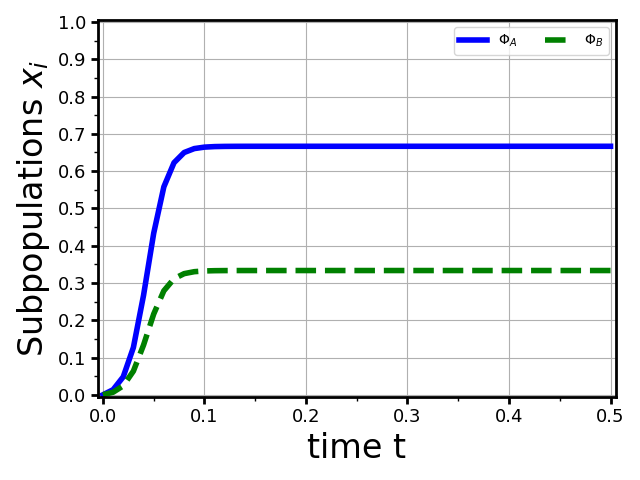

In [13]:
int1 = posmodel.integrate(initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0},
                          initWidgets={'a':[0.001, 0, 1, 0.001],'r':[100, 0, 200, 1],
                                      'q_{A}':[0.8, 0, 1, 0.05],'q_{B}':[0.4, 0, 1, 0.05],
                                      'maxTime':[0.5,0.1,2,0.1]},
                          choose_yrange=[0,1], plotProportions=True, ylab="Subpopulations $x_i$")

## Model with negative social feedback

Also for the case of the system with negative social feedback, the analysis of the deterministic ODE system predicts that a population starting from a fully uncommmitted initial state ($i.e.$ all individuals at time $t=0$ are in uncommitted state $U$) will converge to the distribution with a larger convergence time:

$ A = q_A / (q_A + q_B) $

$ B = q_B / (q_A + q_B) $

FloatSlider(value=0.001, continuous_update=False, description='\\(a\\)', max=1.0, readout_format='.3f', step=0…

FloatSlider(value=0.8, continuous_update=False, description='\\(q_{A}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=0.4, continuous_update=False, description='\\(q_{B}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=200.0, continuous_update=False, description='\\(\\rho\\)', max=400.0, readout_format='.0f', …

FloatSlider(value=3.4, continuous_update=False, description='\\(z\\)', max=50.0, step=0.02, style=SliderStyle(…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=10.0, continuous_update=False, description='Simulation tim…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


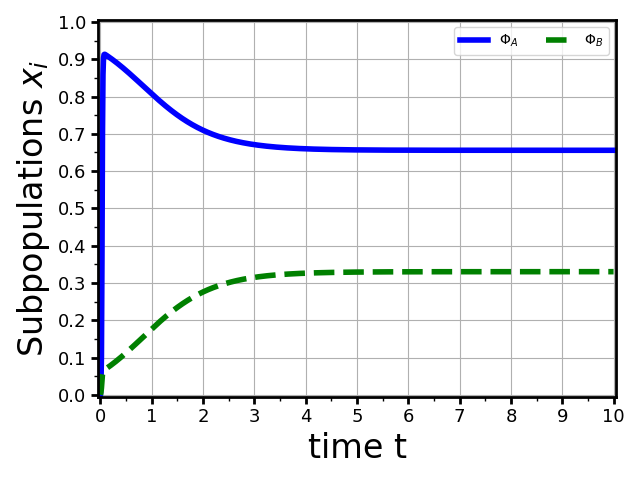

In [15]:
int2 = negmodel.integrate(initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0},
                          initWidgets={'a':[0.001, 0, 1, 0.001],'\\rho':[200, 0, 400, 1],
                                      'q_{A}':[0.8, 0, 1, 0.05],'q_{B}':[0.4, 0, 1, 0.05],
                                      'z':[3.4, 0, 50, 0.02],'maxTime':[10,1,1000,1]},
                          choose_yrange=[0,1], plotProportions=True, ylab="Subpopulations $x_i$")

## Noise and variance

By introducing finite-system noise (via SSA), the analysis shows that the model **without** negative social feedback has a large variance around the dynamics predicted by the ODEs

FloatSlider(value=0.001, continuous_update=False, description='\\(a\\)', max=1.0, readout_format='.3f', step=0…

FloatSlider(value=0.8, continuous_update=False, description='\\(q_{A}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=0.4, continuous_update=False, description='\\(q_{B}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=100.0, continuous_update=False, description='\\(r\\)', max=200.0, readout_format='.0f', step…

FloatSlider(value=200.0, continuous_update=False, description='System size', max=1000.0, min=10.0, readout_for…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=2.0, continuous_update=False, description='Simulation time…

<IPython.core.display.Javascript object>


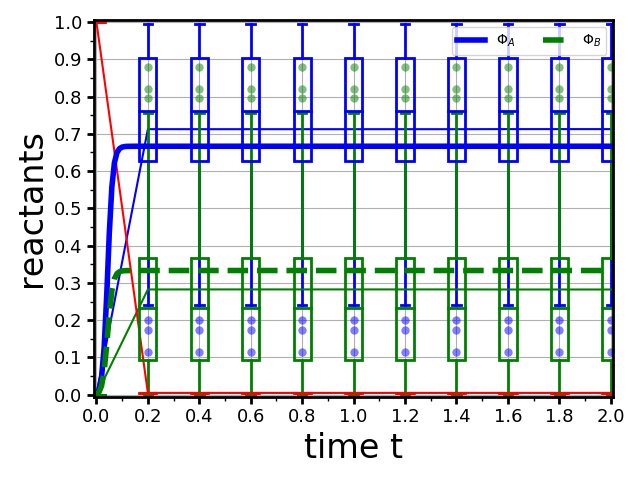

In [16]:
mc1 = mumot.MuMoTmultiController([posmodel.SSA(silent=True), posmodel.integrate(silent=True)],
                           shareAxes=True,
                           initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0}, 
                           initWidgets={'a':[0.001, 0, 1, 0.001],'r':[100, 0, 200, 1],
                                       'q_{A}':[0.8, 0, 1, 0.05],'q_{B}':[0.4, 0, 1, 0.05],
                                       'maxTime':[2,0.1,2,0.1],'systemSize':[200,10,1000,10],
                                       'runs':[50,1,100,1]},
                           choose_yrange=[0,1], ylab="Subpopulations $x_i$")

Instead, the model **with** negative social feedback has a very small variance around the dynamics predicted by the ODEs

FloatSlider(value=0.001, continuous_update=False, description='\\(a\\)', max=1.0, readout_format='.3f', step=0…

FloatSlider(value=0.8, continuous_update=False, description='\\(q_{A}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=0.4, continuous_update=False, description='\\(q_{B}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=200.0, continuous_update=False, description='\\(\\rho\\)', max=400.0, readout_format='.0f', …

FloatSlider(value=3.4, continuous_update=False, description='\\(z\\)', max=50.0, step=0.02, style=SliderStyle(…

FloatSlider(value=200.0, continuous_update=False, description='System size', max=1000.0, min=10.0, readout_for…

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

Accordion(children=(Box(children=(FloatSlider(value=10.0, continuous_update=False, description='Simulation tim…

<IPython.core.display.Javascript object>


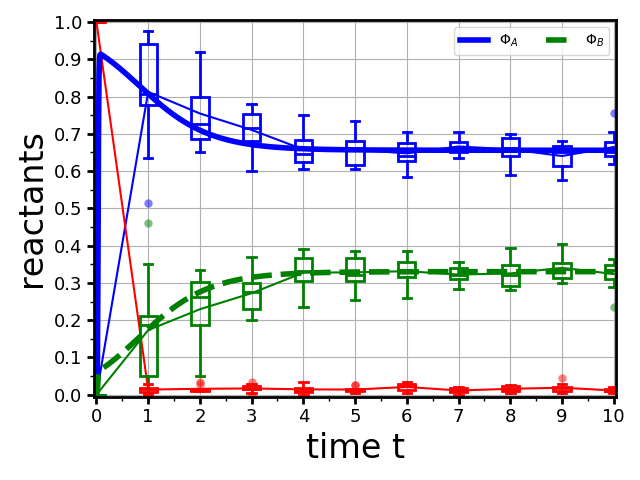

In [17]:
mc2 = mumot.MuMoTmultiController([negmodel.SSA(silent=True), negmodel.integrate(silent=True)],
                           shareAxes=True,
                           initialState = {'B': 0.0, 'U': 1.0, 'A': 0.0}, 
                           initWidgets={'a':[0.001, 0, 1, 0.001],'rho':[200, 0, 400, 1],
                                      'q_{A}':[0.8, 0, 1, 0.05],'q_{B}':[0.4, 0, 1, 0.05],
                                      'z':[3.4, 0, 50, 0.02],'maxTime':[10,1,1000,1],
                                      'systemSize':[200,10,1000,10],'runs':[10,1,100,1]},
                           choose_yrange=[0,1], ylab="Subpopulations $x_i$")

Returning to the analysis of the ODE system, we see that the model without negative social feedback has very slow dynamics if the initial point (at $t=0$) is different from $U=1$, which can be caused by initial random fluctuations:

FloatSlider(value=0.001, continuous_update=False, description='\\(a\\)', max=1.0, readout_format='.3f', step=0…

FloatSlider(value=0.8, continuous_update=False, description='\\(q_{A}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=0.4, continuous_update=False, description='\\(q_{B}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=100.0, continuous_update=False, description='\\(r\\)', max=200.0, readout_format='.0f', step…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.1, continuous_update=False, description='$\\Phi_{A}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


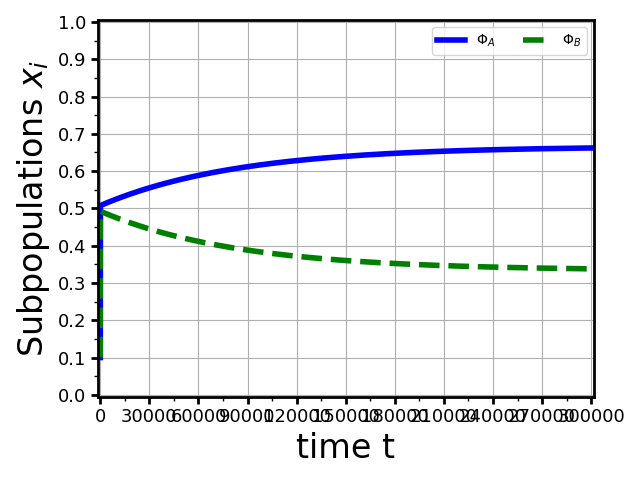

In [20]:
int3 = posmodel.integrate(initWidgets={'initialState':{'B':[0.1,0,1,0.05], 'U':[0.8,0,1,0.05], 'A':[0.1,0,1,0.05]},
                                       'a':[0.001, 0, 1, 0.001],'r':[100, 0, 200, 1],
                                       'q_{A}':[0.8, 0, 1, 0.05],'q_{B}':[0.4, 0, 1, 0.05],
                                       'maxTime':[300000,1,1000000,1]},
                          choose_yrange=[0,1], plotProportions=True, ylab="Subpopulations $x_i$")

Instead the system with negative social feedback has dynamics with speed independed from the initial starting point.

FloatSlider(value=0.001, continuous_update=False, description='\\(a\\)', max=1.0, readout_format='.3f', step=0…

FloatSlider(value=0.8, continuous_update=False, description='\\(q_{A}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=0.4, continuous_update=False, description='\\(q_{B}\\)', max=1.0, step=0.05, style=SliderSty…

FloatSlider(value=200.0, continuous_update=False, description='\\(\\rho\\)', max=400.0, readout_format='.0f', …

FloatSlider(value=3.4, continuous_update=False, description='\\(z\\)', max=50.0, step=0.02, style=SliderStyle(…

FloatSlider(value=10.0, continuous_update=False, description='System size', min=5.0, readout_format='.0f', ste…

Accordion(children=(Box(children=(FloatSlider(value=0.1, continuous_update=False, description='$\\Phi_{A}$ at …

Box(children=(Button(icon='bookmark', style=ButtonStyle(), tooltip='Paste bookmark to log'), Button(icon='save…

HTML(value='')

<IPython.core.display.Javascript object>


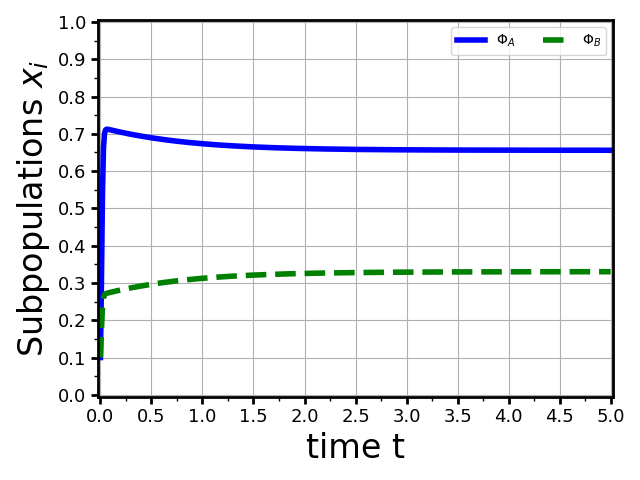

In [24]:
int4 = negmodel.integrate(initWidgets={'initialState':{'B':[0.1,0,1,0.05], 'U':[0.8,0,1,0.05], 'A':[0.1,0,1,0.05]},
                                       'a':[0.001, 0, 1, 0.001],'\\rho':[200, 0, 400, 1],
                                       'q_{A}':[0.8, 0, 1, 0.05],'q_{B}':[0.4, 0, 1, 0.05],
                                       'z':[3.4, 0, 50, 0.02],'maxTime':[5,1,100,1]},
                          choose_yrange=[0,1], plotProportions=True, ylab="Subpopulations $x_i$")

# References 
<a id='references'></a>
<ul>
<li>Reina, A. &amp; Marshall, J. A. R. (2020) Negative feedback may suppress variation to improve collective foraging performance. <i>In preparation</i>
<li>von Frisch K (1967). <i>The Dance Language and Orientation of Bees</i>. Belknap Press, Cambridge, MA.
<li>Nieh, J. (1993). The stop signal of the honey bee: reconsidering its message. <i>Behav. Ecol. Sociobiol.</i> <b>33</b>, 51–56.
</ul>